In [1]:
#Шаг 1. Откройте файл с данными и изучите общую информацию
#Путь к файлу:
#/datasets/games.csv /datasets/rating.csv — данные о рейтинге ESRB

import pandas as pd
games = pd.read_csv('games.csv')
rating = pd.read_csv('rating.csv')

In [2]:
#games.to_csv('games.csv', index=False)
#rating.to_csv('rating.csv', index=False)

In [3]:
#Шаг 2. Подготовьте данные
#Замените названия столбцов.

In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_players,EU_players,RU_players,Other_players,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
rating

,rating_type,decryption
0,E,Для всех
1,M,От 17 лет
2,T,Подросткам 13—19 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)
5,AO,Только для взрослых
6,EC,Для детей младшего возраста
7,RP,Рейтинг ожидается


In [6]:
games.set_axis(['name',
               'platform',
               'year_of_relise',
               'genre',
               'na_players',
               'eu_players',
               'ru_players',
               'other_players',
               'critic_score',
               'user_score',
               'rating_type'], 
               axis = 'columns', 
               inplace = True)

In [7]:
games.head()

,name,platform,year_of_relise,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating_type
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
#Посчитайте количество продаж во всех регионах и запишите в отдельный столбец.
def counter(data):
    summa = data['na_players'] + data['eu_players'] + data['ru_players'] + data['other_players']
    return summa

games['all_players'] = games.apply(counter, axis=1)
games.head()

,name,platform,year_of_relise,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating_type,all_players
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [9]:
#Приведите данные к нужным типам:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 12 columns):
name              16717 non-null object
platform          16719 non-null object
year_of_relise    16450 non-null float64
genre             16717 non-null object
na_players        16719 non-null float64
eu_players        16719 non-null float64
ru_players        16719 non-null float64
other_players     16719 non-null float64
critic_score      8137 non-null float64
user_score        10015 non-null object
rating_type       9950 non-null object
all_players       16719 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


In [10]:
print('В графе с названием всего 2 пропуска, поэтому смело их удалим')
games.dropna(subset = ['name'], inplace = True)

В графе с названием всего 2 пропуска, поэтому смело их удалим


In [11]:
print("""Пропуски в столбце с годом издания заменим на 2021, тк скорее всего эти игры еще на ранней стадии разработки
Сразу приведем данные к типу int""")
games['year_of_relise'] = games['year_of_relise'].fillna(2021.0)
games['year_of_relise'] = games['year_of_relise'].astype('int')

Пропуски в столбце с годом издания заменим на 2021, тк скорее всего эти игры еще на ранней стадии разработки
Сразу приведем данные к типу int


In [12]:
print('Заменим пропуски в rating_type на RP(рейтинг ожидается) и сразу сольем с таблицей рейтингов')
games['rating_type'] = games['rating_type'].fillna('RP')
games = games.merge(rating, on='rating_type')

Заменим пропуски в rating_type на RP(рейтинг ожидается) и сразу сольем с таблицей рейтингов


In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16716
Data columns (total 13 columns):
name              16717 non-null object
platform          16717 non-null object
year_of_relise    16717 non-null int32
genre             16717 non-null object
na_players        16717 non-null float64
eu_players        16717 non-null float64
ru_players        16717 non-null float64
other_players     16717 non-null float64
critic_score      8137 non-null float64
user_score        10015 non-null object
rating_type       16717 non-null object
all_players       16717 non-null float64
decryption        16717 non-null object
dtypes: float64(6), int32(1), object(6)
memory usage: 1.7+ MB


In [14]:
print('Проверим наличае дубликатов в названии')
print(games['name'].duplicated().sum(), 'дубликатов')

Проверим наличае дубликатов в названии
5155 дубликатов


In [15]:
print('Оказывается есть дубликаты, проверим приведение к нижнему регистру увеличит их колличество? Нет, тогда оставляем как есть')
print(games['name'].str.lower().duplicated().sum(), 'дубликатов')

Оказывается есть дубликаты, проверим приведение к нижнему регистру увеличит их колличество? Нет, тогда оставляем как есть
5155 дубликатов


In [16]:
print('Проверим наличае дубликатов в названии и платформе одновременно, тк одну и ту же игру могли разрабатывать на нескольких платформах')
print(games.duplicated(['name', 'platform']).sum(), 'дубликатов')

Проверим наличае дубликатов в названии и платформе одновременно, тк одну и ту же игру могли разрабатывать на нескольких платформах
4 дубликатов


In [17]:
print('C 4-мя срочками можно спокойно расстаться')
games = games.drop_duplicates(['name', 'platform']).reset_index(drop = True)
print(games.duplicated(['name', 'platform']).sum(), 'дубликатов осталось')

C 4-мя срочками можно спокойно расстаться
0 дубликатов осталось


In [18]:
import numpy as np

print('В user_score есть значения tbd, что означает - ожидается оценка, для нас же это то же самое что и NaN, заменим и приведем к типу float')
games['user_score'].loc[games['user_score'] == 'tbd'] = np.nan
games['user_score'] = games['user_score'].astype('float')

В user_score есть значения tbd, что означает - ожидается оценка, для нас же это то же самое что и NaN, заменим и приведем к типу float


C:\Users\gamer\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
print('С типами данных и пропусками все отлично!')

С типами данных и пропусками все отлично!


In [20]:
#Шаг 3. Проведите исследовательский анализ данных
#Постройте распределение по годам релиза и опишите полученный результат

In [21]:
#Функция выводит результаты по годам
def goda(data):
    data_pivot = data.pivot_table(index='year_of_relise', values ='name', aggfunc='count')
    data_pivot.plot(y = 'name', 
                          style = 'o-',
                          figsize = (15, 7),
                          grid = True)
    print(data_pivot)

In [22]:
goda(games)

                name
year_of_relise      
1980               9
1981              46
1982              36
1983              17
1984              14
1985              14
1986              21
1987              16
1988              15
1989              17
1990              16
1991              41
1992              43
1993              60
1994             121
1995             219
1996             263
1997             289
1998             379
1999             338
2000             350
2001             482
2002             829
2003             775
2004             762
2005             938
2006            1006
2007            1197
2008            1427
2009            1426
2010            1255
2011            1136
2012             651
2013             544
2014             581
2015             606
2016             502
2017               3
2020               1
2021             268


In [23]:
print("""Пик выпуска игр был с 2006 по 2011 года, причем с 1980 до 2006 колличество игр почти постоянно росло
После 2011 колличество игр упало и составляет примерно 550""")

Пик выпуска игр был с 2006 по 2011 года, причем с 1980 до 2006 колличество игр почти постоянно росло
После 2011 колличество игр упало и составляет примерно 550


In [24]:
#Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод
import numpy as np

def otziv(data):
    if (pd.isna(data['critic_score'])) & ((pd.isna(data['user_score'])) or (data['user_score'] == 'tbd')):
        return 'без отвывов'
    else:
        return 'с отзывами'

games['otziv'] = games.apply(otziv, axis=1)

In [25]:
games_s_otzivom = games.query('otziv == "с отзывами"')
games_bez_otziva = games.query('otziv == "без отвывов"')

                name
year_of_relise      
1985               1
1988               1
1992               1
1994               1
1996               8
1997              21
1998              33
1999              40
2000             148
2001             327
2002             636
2003             602
2004             573
2005             675
2006             644
2007             731
2008             781
2009             711
2010             536
2011             535
2012             337
2013             305
2014             334
2015             301
2016             267
2021             157


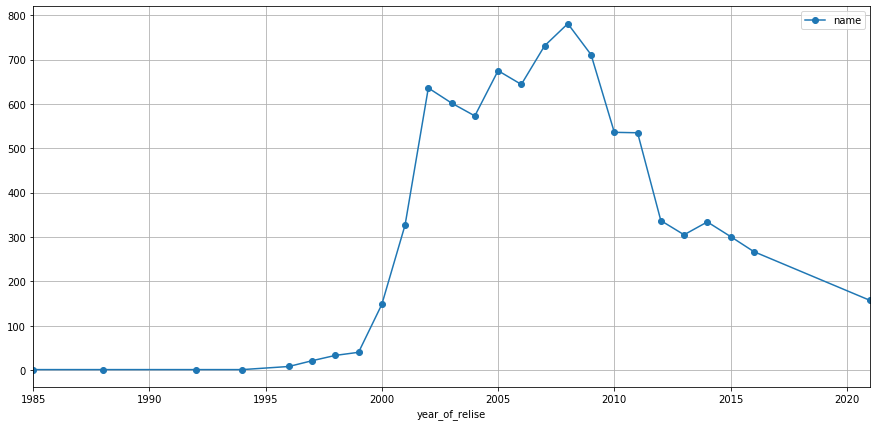

In [26]:
goda(games_s_otzivom)

                name
year_of_relise      
1980               9
1981              46
1982              36
1983              17
1984              14
1985              13
1986              21
1987              16
1988              14
1989              17
1990              16
1991              41
1992              42
1993              60
1994             120
1995             219
1996             255
1997             268
1998             346
1999             298
2000             202
2001             155
2002             193
2003             173
2004             189
2005             263
2006             362
2007             466
2008             646
2009             715
2010             719
2011             601
2012             314
2013             239
2014             247
2015             305
2016             235
2017               3
2020               1
2021             111


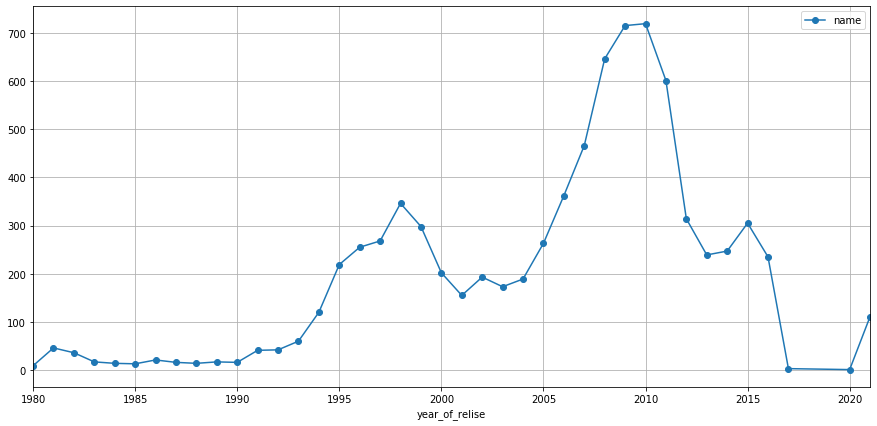

In [27]:
goda(games_bez_otziva)

In [28]:
print("""С 2002 по 2011 год было больше всего игр с отзывами, до 2002 колличество игр с отзывами росло,после 2011 держится на уровне 300
Пик игр без отзывов другой: с 2008 по 2011 года""")

С 2002 по 2011 год было больше всего игр с отзывами, до 2002 колличество игр с отзывами росло,после 2011 держится на уровне 300
Пик игр без отзывов другой: с 2008 по 2011 года


                all_players
year_of_relise             
1980                  11.38
1981                  35.68
1982                  28.88
1983                  16.80
1984                  50.35
1985                  53.95
1986                  37.08
1987                  21.70
1988                  47.21
1989                  73.45
1990                  49.37
1991                  32.23
1992                  76.16
1993                  45.99
1994                  79.23
1995                  88.12
1996                 199.15
1997                 201.07
1998                 256.31
1999                 251.11
2000                 201.66
2001                 331.46
2002                 394.97
2003                 357.54
2004                 418.68
2005                 456.57
2006                 517.71
2007                 604.75
2008                 671.50
2009                 658.82
2010                 590.13
2011                 507.58
2012                 355.75
2013                

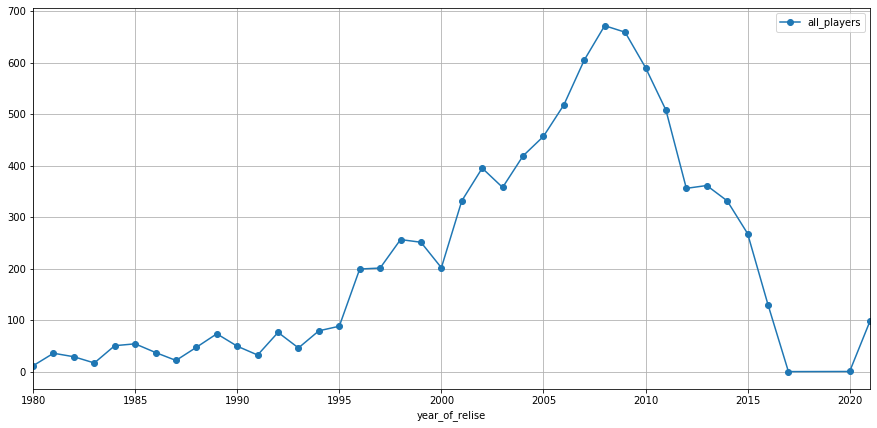

In [29]:
#Постройте график продаж по каждому году; сделайте вывод
games_platform_pivot = games.pivot_table(index='year_of_relise', values ='all_players', aggfunc='sum')
games_platform_pivot.plot(y = 'all_players', 
                          style = 'o-',
                          figsize = (15, 7),
                          grid = True)
print(games_platform_pivot)

In [30]:
print("""Пик продаж игр был с 2006 по 2011 года, причем с 1980 до 2006 колличество игр почти постоянно росло
После 2011 колличество продаж игр упало""")

Пик продаж игр был с 2006 по 2011 года, причем с 1980 до 2006 колличество игр почти постоянно росло
После 2011 колличество продаж игр упало


(0, 0.6)

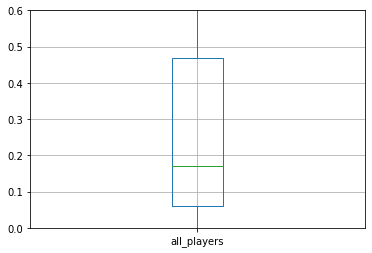

In [31]:
#Постройте ящик с усами по глобальным продажам, опишите полученный результат
import matplotlib.pyplot as plt

games.boxplot(column='all_players')
plt.ylim(0, 0.6)

In [32]:
print('Основная масса игр имела от 60 до 470 тысяч игроков с медианой 170 тысяч')

Основная масса игр имела от 60 до 470 тысяч игроков с медианой 170 тысяч


In [33]:
#Узнайте, на какой платформе было выпущено больше всего игр
print('Больше всего игр выпустили на платформе')
print(games.pivot_table(index='platform', 
                        values ='name', 
                        aggfunc='count').sort_values(by = 'name',
                                                     ascending = False).head(1))

Больше всего игр выпустили на платформе
          name
platform      
PS2       2161


In [34]:
#Определите, игр какого жанра больше всего
print('Больше всего игр жанра')
print(games.pivot_table(index='genre', 
                        values ='name', 
                        aggfunc='count').sort_values(by = 'name',
                                                     ascending = False).head(1))

Больше всего игр жанра
        name
genre       
Action  3370


In [35]:
#Найдите игры с наибольшей и наименьшей оценкой от критиков
print('Игры с наибольшей оценкой от критиков')
print(games.sort_values(by = 'critic_score',
                        ascending = False).loc[:, ['name', 'critic_score']].head())

Игры с наибольшей оценкой от критиков
                           name  critic_score
12357  Tony Hawk's Pro Skater 2          98.0
10776       Grand Theft Auto IV          98.0
10774       Grand Theft Auto IV          98.0
13377               SoulCalibur          98.0
12403             Metroid Prime          97.0


In [36]:
print('Игры с наименьшей оценкой от критиков')
print(games.sort_values(by = 'critic_score',
                        ascending = True).loc[:, ['name', 'critic_score']].head())

Игры с наименьшей оценкой от критиков
                                      name  critic_score
12168                         Ride to Hell          13.0
11965  Leisure Suit Larry: Box Office Bust          17.0
16636                        Balls of Fury          19.0
2616                              Rugby 15          19.0
3116                             Anubis II          19.0


In [37]:
#Найдите игры с наибольшей и наименьшей оценкой от пользователей
print('Игры с наибольшей оценкой от пользователей')
print(games.sort_values(by = 'user_score',
                        ascending = False).query('user_score != "tbd"').loc[:, ['name', 'user_score']].head())

Игры с наибольшей оценкой от пользователей
                                        name  user_score
14998                     Breath of Fire III         9.7
885    Harvest Moon: Friends of Mineral Town         9.6
2326         Boktai: The Sun is in Your Hand         9.6
2640                       Cory in the House         9.5
3978                           Karnaaj Rally         9.5


In [38]:
print('Игры с наименьшей оценкой от пользователей')
print(games.sort_values(by = 'user_score',
                        ascending = True).loc[:, ['name', 'user_score']].head())

Игры с наименьшей оценкой от пользователей
                                            name  user_score
734           My Little Pony: Pinkie Pie's Party         0.0
2600                               Madden NFL 17         0.2
3491              Myth Makers: Trixie in Toyland         0.2
1500                                  Happy Feet         0.3
3422  Billy the Wizard: Rocket Broomstick Racing         0.3


In [39]:
#Оцените корреляцию между оценками критиков и пользовательскими оценками.
print(games['critic_score'].corr(games['user_score']))

0.5807761971133988


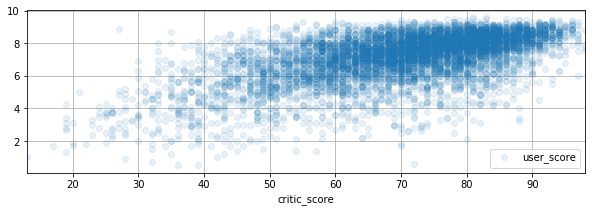

In [40]:
games.plot(x = 'critic_score', 
           y = 'user_score',
           style = 'o',
           grid=True, 
           figsize=(10, 3), 
           alpha=0.1)

In [41]:
print('Корреляция между оценками критиков и пользовательскими оценками равна 0.58, а это значит что зависимость между ними есть')

Корреляция между оценками критиков и пользовательскими оценками равна 0.58, а это значит что зависимость между ними есть


In [42]:
#Шаг 4. Составьте портрет пользователя для каждого региона

In [43]:
#Для пользователей каждого региона (Северная Америка, Европа и Россия) определите:
#топ-5 предпочтительных жанров
def top_5(data, location, genre):
    print(games.pivot_table(index = genre, 
                            values = location, 
                            aggfunc='sum').sort_values(by = location,
                                                         ascending = False).head())
    print()
for row in ['na_players', 'eu_players', 'ru_players']:
    top_5(games, row, 'genre')

          na_players
genre               
Action        879.01
Sports        684.43
Shooter       592.24
Platform      445.50
Misc          407.27

         eu_players
genre              
Action       519.13
Sports       376.78
Shooter      317.34
Racing       236.32
Misc         212.74

              ru_players
genre                   
Role-Playing      355.46
Action            161.44
Sports            135.54
Platform          130.83
Misc              108.11



In [44]:
print("""Жанры экшн, спорт, разное популярны везде, 
в Европе и Америке популярен жанр шутер, 
в Америке и России - платформенные игры, 
в Европе в топ попали гонки """)

Жанры экшн, спорт, разное популярны везде, 
в Европе и Америке популярен жанр шутер, 
в Америке и России - платформенные игры, 
в Европе в топ попали гонки 


In [45]:
#в какие года пользователи были наиболее активны (больше всего покупали игры)
print('Года, когда пользователи были наиболее активны')

print(games.pivot_table(index='year_of_relise', 
                        values ='all_players', 
                        aggfunc='sum').sort_values(by = 'all_players',
                                                   ascending = False).head())

Года, когда пользователи были наиболее активны
                all_players
year_of_relise             
2008                 671.50
2009                 658.82
2007                 604.75
2010                 590.13
2006                 517.71


In [46]:
#топ-5 предпочтительных платформ
print('Самые предпочтительные платформы:')
top_5(games, 'all_players', 'platform')

Самые предпочтительные платформы:
          all_players
platform             
PS2           1255.77
X360           970.17
PS3            939.16
Wii            907.51
DS             806.41



In [47]:
#какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)
print('Самые предпочтительные игры по рейтингу ESRB:')
top_5(games, 'all_players', 'decryption')

Самые предпочтительные игры по рейтингу ESRB:
                        all_players
decryption                         
Рейтинг ожидается           2847.06
Для всех                    2435.80
Подросткам 13—19 лет        1492.02
От 17 лет                   1473.79
Для всех старше 10 лет       655.12



In [48]:
#Шаг 5. Проверьте гипотезы:
print("""Проверим гипотизы:
-средний пользовательский рейтинг платформ PS2 и PS3 одинаковый
-средний пользовательский рейтинг жанров Action и Sports различается""")
from scipy import stats as st
print('альфу примем за 0.05')
alpha = 0.05

def gipoteza(data_1, data_2):
    results = st.ttest_ind(
        data_1['user_score'], 
        data_2['user_score'],
        )

    print('p-значение:', results.pvalue)

    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

Проверим гипотизы:
-средний пользовательский рейтинг платформ PS2 и PS3 одинаковый
-средний пользовательский рейтинг жанров Action и Sports различается
альфу примем за 0.05


In [49]:
print('Чтобы мы могли сравнивать заполним пропуски в данных')

Чтобы мы могли сравнивать заполним пропуски в данных


In [50]:
print('Заменим пропуски в рейтинге критиков на средние значения и сразу приведем к типу int')
games['critic_score'] = games['critic_score'].fillna(games['critic_score'].mean()).astype('int')

Заменим пропуски в рейтинге критиков на средние значения и сразу приведем к типу int


In [51]:
print('Заменим пропуски в рейтинге пользователей на средние значения, а там где tbd на рейтинг критиков и сразу приведем к типу int')
games.loc[games['user_score'] == 'tbd', 'user_score'] = games['critic_score'].astype('float') / 10
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'raise')
games['user_score'] = games['user_score'].fillna(games['user_score'].mean())
games['user_score'] = games['user_score'] * 10
games['user_score'] = games['user_score'].astype('int')

Заменим пропуски в рейтинге пользователей на средние значения, а там где tbd на рейтинг критиков и сразу приведем к типу int


C:\Users\gamer\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [52]:
#средний пользовательский рейтинг платформ PS2 и PS3 одинаковый;
print('Cредний пользовательский рейтинг платформ PS2 и PS3 одинаковый')
gipoteza(games.query('platform == "PS2"'), games.query('platform == "PS3"'))
print('Получается рейтинг платформ различен')

Cредний пользовательский рейтинг платформ PS2 и PS3 одинаковый
p-значение: 3.850553460584592e-45
Отвергаем нулевую гипотезу
Получается рейтинг платформ различен


In [53]:
#средний пользовательский рейтинг жанров Action и Sports различается.
print('Cредний пользовательский рейтинг жанров Action и Sports различается')
gipoteza(games.query('genre == "Action"'), games.query('genre == "Sports"'))
print('Получается рейтинг жанров одинаков')

Cредний пользовательский рейтинг жанров Action и Sports различается
p-значение: 0.17021406146733126
Не получилось отвергнуть нулевую гипотезу
Получается рейтинг жанров одинаков


In [54]:
#Шаг 6. Напишите общий вывод
print("""
ОБЩИЙ ВЫВОД!!!

Пик выпуска игр был с 2006 по 2011 года
С 2002 по 2011 год было больше всего игр с отзывами
Пик игр без отзывов с 2008 по 2011 года

Пик продаж игр был с 2006 по 2011 года

Основная масса игр имела от 60 до 470 тысяч игроков с медианой 170 тысяч

Больше всего игр выпустили на платформе PS2

Больше всего игр жанра Экшен""")
print()
print('Игры с наибольшей оценкой от критиков')
print(games.sort_values(by = 'critic_score',
                        ascending = False).loc[:, ['name', 'critic_score']].head())
print('Игры с наименьшей оценкой от пользователей')
print(games.sort_values(by = 'user_score',
                        ascending = True).loc[:, ['name', 'user_score']].head())
print()
print("""Корреляция между оценками критиков и пользовательскими оценками равна 0.58, а это значит что зависимость между ними есть

Жанры экшн, спорт, разное популярны везде, 
в Европе и Америке популярен жанр шутер, 
в Америке и России - платформенные игры, 
в Европе в топ попали гонки""")
print()
print('Года, когда пользователи были наиболее активны')

print(games.pivot_table(index='year_of_relise', 
                        values ='all_players', 
                        aggfunc='sum').sort_values(by = 'all_players',
                                                   ascending = False).head())
print('Самые предпочтительные платформы:')
top_5(games, 'all_players', 'platform')
print('Самые предпочтительные игры по рейтингу ESRB:')
top_5(games, 'all_players', 'decryption')

print("""Cредний пользовательский рейтинг платформ PS2 и PS3 различается
Cредний пользовательский рейтинг жанров Action и Sports одинаков""")


ОБЩИЙ ВЫВОД!!!

Пик выпуска игр был с 2006 по 2011 года
С 2002 по 2011 год было больше всего игр с отзывами
Пик игр без отзывов с 2008 по 2011 года

Пик продаж игр был с 2006 по 2011 года

Основная масса игр имела от 60 до 470 тысяч игроков с медианой 170 тысяч

Больше всего игр выпустили на платформе PS2

Больше всего игр жанра Экшен

Игры с наибольшей оценкой от критиков
                           name  critic_score
10776       Grand Theft Auto IV            98
12357  Tony Hawk's Pro Skater 2            98
10774       Grand Theft Auto IV            98
13377               SoulCalibur            98
10794      Halo: Combat Evolved            97
Игры с наименьшей оценкой от пользователей
                                            name  user_score
734           My Little Pony: Pinkie Pie's Party           0
2600                               Madden NFL 17           2
3491              Myth Makers: Trixie in Toyland           2
3422  Billy the Wizard: Rocket Broomstick Racing           3

In [55]:
#Описание данных

#Name — название игры
#Platform — платформа
#Year_of_Release — год релиза
#Genre — жанр игры
#NA_players — продажи игрокам в Северной Америке (в миллионах долларов)
#EU_players — продажи игрокам в Европе (в миллионах долларов)
#RU_players — продажи игрокам в России (в миллионах долларов)
#Other_players — продажи игрокам в других странах
#Critic_Score — оценка критиков (максимум 100)
#User_Score — оценка пользователей (максимум 10)
#Rating — рейтинг ESRB